## Script for CNN to classify xray chest pneumonia 

In [38]:
# Import the libraries

import tensorflow as tf
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

In [39]:
# Import datasets

labels = ['PNEUMONIA', 'NORMAL']
img_size = 150
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            resized_arr = cv2.resize(img_arr, (img_size, img_size))
            data.append([resized_arr, class_num])
    
    return np.array(data)

In [40]:
train = get_training_data('chest_xray/train')
test = get_training_data('chest_xray/test')
val = get_training_data('chest_xray/val')

x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

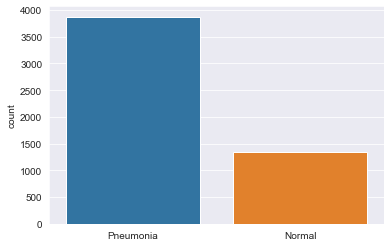

In [41]:
# Data Visualization

l = []
for i in train:
    if(i[1] == 0):
        l.append("Pneumonia")
    else:
        l.append("Normal")
sns.set_style('darkgrid')
sns.countplot(l) 

Text(0.5, 1.0, 'NORMAL')

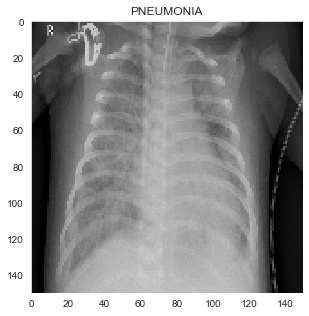

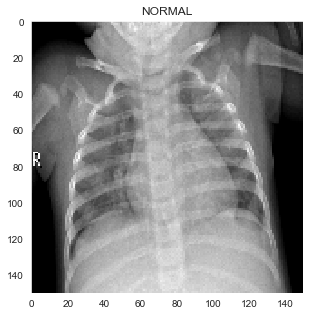

In [42]:
# Previewing the images of both the classes

plt.figure(figsize = (5,5))
plt.imshow(train[0][0], cmap='gray')
plt.grid(False)
plt.title(labels[train[0][1]])

plt.figure(figsize = (5,5))
plt.imshow(train[-2][0], cmap='gray')
plt.grid(False)
plt.title(labels[train[-2][1]])

In [43]:
# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255



# resize data for deep learning 
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

In [44]:
datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range = 30,
        zoom_range = 0.2,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip = False,
        vertical_flip=False)

In [45]:
datagen.fit(x_train)

In [46]:
# Build Model

model = Sequential()

In [47]:
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (150,150,1)))

In [48]:
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

In [49]:
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))

In [50]:
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

In [51]:
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))

In [52]:
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

In [53]:
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))

In [54]:
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

In [55]:
model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))

In [56]:
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

In [57]:
model.add(Flatten())

In [58]:
model.add(Dense(units = 128 , activation = 'relu'))

In [59]:
model.add(Dropout(0.2))

In [60]:
model.add(Dense(units = 1 , activation = 'sigmoid'))

In [61]:
model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [62]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 150, 150, 32)      320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 38, 38, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 38, 38, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 19, 19, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 19, 19, 128)      

In [63]:
history = model.fit(datagen.flow(x_train,y_train, batch_size = 32) ,epochs = 5 , validation_data = datagen.flow(x_val, y_val))

Epoch 1/5
163/163 [==============================] - 560s 3s/step - loss: 0.5244 - accuracy: 0.7535 - val_loss: 1.4104 - val_accuracy: 0.6875
Epoch 2/5
163/163 [==============================] - 578s 4s/step - loss: 0.3998 - accuracy: 0.8083 - val_loss: 0.6451 - val_accuracy: 0.5625
Epoch 3/5
163/163 [==============================] - 597s 4s/step - loss: 0.3478 - accuracy: 0.8413 - val_loss: 0.5925 - val_accuracy: 0.7500
Epoch 4/5
163/163 [==============================] - 598s 4s/step - loss: 0.2942 - accuracy: 0.8790 - val_loss: 0.4205 - val_accuracy: 0.8750
Epoch 5/5
163/163 [==============================] - 623s 4s/step - loss: 0.2502 - accuracy: 0.8972 - val_loss: 0.6275 - val_accuracy: 0.8750


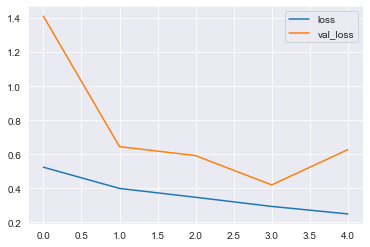

In [64]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()